<a href="https://colab.research.google.com/github/AayushiC/COMPUTATIONAL-STUDY-OF-ELECTRONIC-PROPERTIES-OF-MATERIALS/blob/main/1D_Tight_Binding_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
1# 1-D Lattice (1 atom basis)

L = int(input("Total length of chain: "))
N = int(input("Number of atoms: "))
e = float(input("On-site parameter: "))
t = float(input("Hopping parameter: "))

Total length of chain: 200
Number of atoms: 2000
On-site parameter: 0
Hopping parameter: 1


In [ ]:
# Constructing the Hamiltonian

POS = np.zeros(N,int)
Nlist = np.zeros((N,2),int)

for i in range(N):
  POS[i] = i

for i in range(N):
  Nlist[i,0] = POS[(i+N-1)%N]
  Nlist[i,1] = POS[(i+N+1)%N]

H = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    if i == j:
      H[i,j] = e
    elif j in Nlist[i]:
      H[i,j] = t

# H = np.zeros((N,N))
# for i in range(N):
#   for j in range(N):
#     if i==j:
#       H[i,j] = e
#     if j == i-1 or j == i+1:
#       H[i,j] = t
# print(H)

In [ ]:
# Determining Eigen Values and Eigen Vectors from the Hamiltonian Matrix

E,W = np.linalg.eig(H)

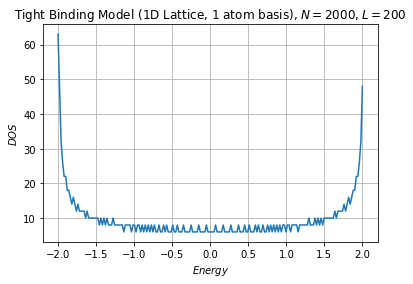

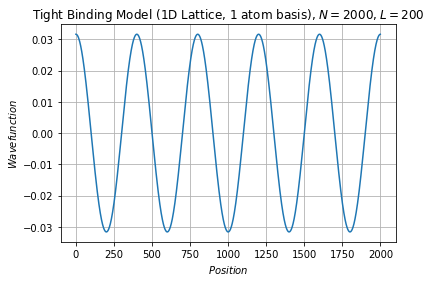

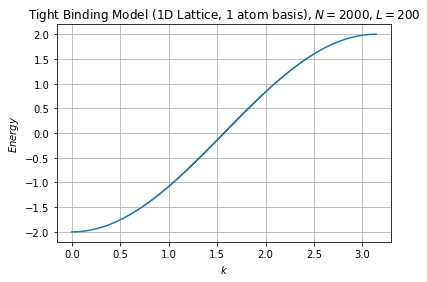

In [ ]:
# Plotting Density of States vs Energy

_E = np.sort(E)
ene = np.linspace(-2.0*t,2.0*t,L)
DOS = np.zeros(L)
de = 4.0*t/L
for i in range(L):
  eh=-2.0*t + i*de + de/2.0
  el=-2.0*t + i*de - de/2.0
  s=0
  for j in range(N):
    if _E[j] >= el and _E[j] <=eh:
      s += 1
  DOS[i] = s

# for i in range(len(_E)):
#   if i == 0:
#     DOS[i] = (2*(k[i+1] - k[i]))/(np.pi*(_E[i+1] - _E[i]))
#   elif i == (len(_E))-1:
#     DOS[i] = (2*(k[i] - k[i-1]))/(np.pi*(_E[i] - _E[i-1]))
#   else:
#     DOS[i] = (2*(k[i+1] - k[i-1]))/(np.pi*(_E[i+1] - _E[i-1]))

fig, ax = plt.subplots()
ax.set_title('Tight Binding Model (1D Lattice, 1 atom basis), $N='+str(N)+', L='+str(L)+'$')
ax.set_ylabel('$DOS$')
ax.set_xlabel('$Energy$')
ax.plot(ene,DOS)
ax.grid(True)

# Plotting Wave function vs position 

pos = np.linspace(0,N-1,N)
_E = E
idx = np.argsort(_E)[::-1][:N]
_W = W[:,idx]
fig, ax = plt.subplots()
ax.set_title('Tight Binding Model (1D Lattice, 1 atom basis), $N='+str(N)+', L='+str(L)+'$')
ax.set_ylabel('$Wave function$')
ax.set_xlabel('$Position$')
ax.plot(pos,_W[:,10])
ax.grid(True)

# Plotting Energy vs k 

k = np.linspace(0,np.pi,N)
_E = np.sort(E)
fig, ax = plt.subplots()
ax.set_title('Tight Binding Model (1D Lattice, 1 atom basis), $N='+str(N)+', L='+str(L)+'$')
ax.set_ylabel('$Energy$')
ax.set_xlabel('$k$')
ax.plot(k,_E)
ax.grid(True)
